#### Analisis de un amplificador clase B exitado con una señal Banda Lateral Unica.

El siguiente circuito corresponde a un amplificador Clase B. 


Se estudiara la respuesta del amplificador exitado con una modulación BLU. 





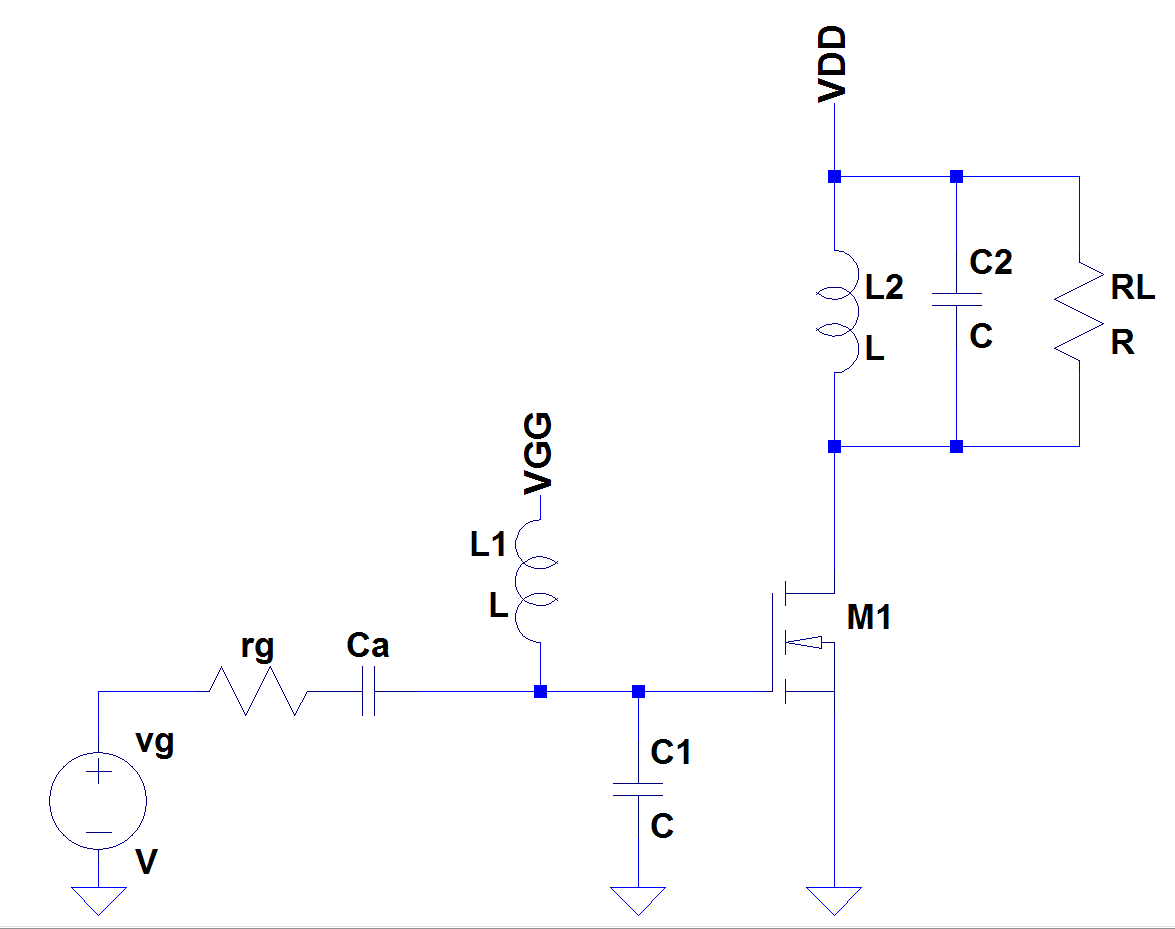

In [482]:
import pandas as pd
import numpy as np
import scipy as sp
from math import cos, log10 
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image  

params = {'legend.fontsize': 24,
          'figure.figsize': (15, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

Image(filename= "/home/aalmela/Dropbox/EAIII/04- Ejercitacion/clase c/figures/ejercicio_1lt.png",width=550)

In [483]:
def myFourier(armonicos, x, y, dt, Tm):
    y_f = list()
    for a in armonicos: 
        if a == 0 : 
            yf_o = 0.0
            for i,xi in enumerate(x):
                yf_o += y[i]*dt/Tm
            y_f.append(yf_o)
        else : 
            yf_a = 0.0

            for i,xi in enumerate(x):
                yf_a += 2.*dt/Tm * y[i]*np.cos(2*np.pi*a*xi)
            y_f.append(yf_a)
    return y_f


In [484]:
#parametros de la senal AM
amp = 5
ampa  = amp    #amplitud de la portadora
fa   = 99    #frecuencia 
ampb = amp
fb   = 101     #frecuencia 

fmax = (fa+fb)/2
fmin = fb - fmax
print(fmin,fmax)
#tiempo de un periodo de la modulante
Tm  = 1/fmin
#delta time para el calculo de los armonicos
dt  = 1/(fmax*10)

#parametros del filtro de salida
fo = fmax
BW = 2*fmin*5
Qc = fo/BW

#parametros del transistor
Vgs_min = 10 
Vgs_max = 200

1.0 100.0


Respesta del transistor

Esta funcion representa la respuesta del transistor

In [485]:
def idi(v):
    i = 0. if (v < 0.)  else 0
    i = (8./5.)*(v-0.) if (v >= 0 and v < 5) else i  
    i = 8.+(2./5.)*(v-5.) if (v >= 5 and v < 10)   else i
    i = 10. if (v >= 10 )   else i
    return i


Plot de la respesta

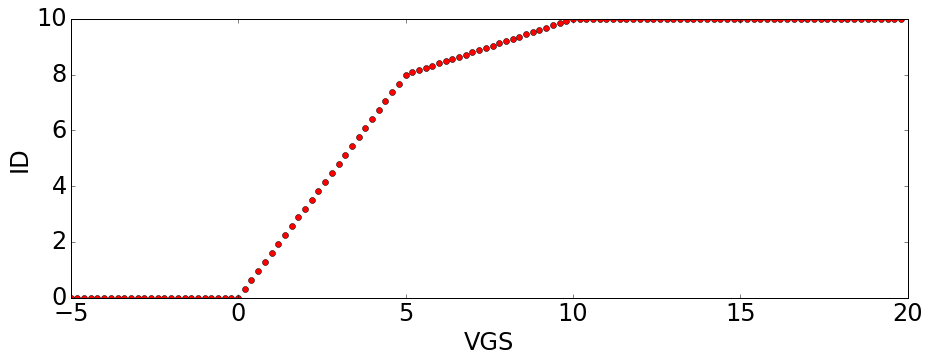

In [486]:
vgs = np.arange(-5.,20.,0.2)

ids = []
for v in vgs:
    ids.append(idi(v))
#%matplotlib inline
#plt.gca().cla()
plt.plot(vgs,ids,'ro')
#plt.axis([-10, 10, -1, 11])
plt.ylabel('ID')
plt.xlabel('VGS')
plt.rcParams['figure.figsize'] = (20.0, 4.0)
plt.show()

Se define la funcion de la tension de entrada vgs como una senal AM

In [487]:
def vblu(ampa,th_a,ampb,th_b):
    return ampa*cos(th_a)+ampb*cos(th_b)

def vblup(amp,th_a,th_b):
    return 2*(amp)*(cos(th_a)*cos(th_b))

Plot de la senal AM

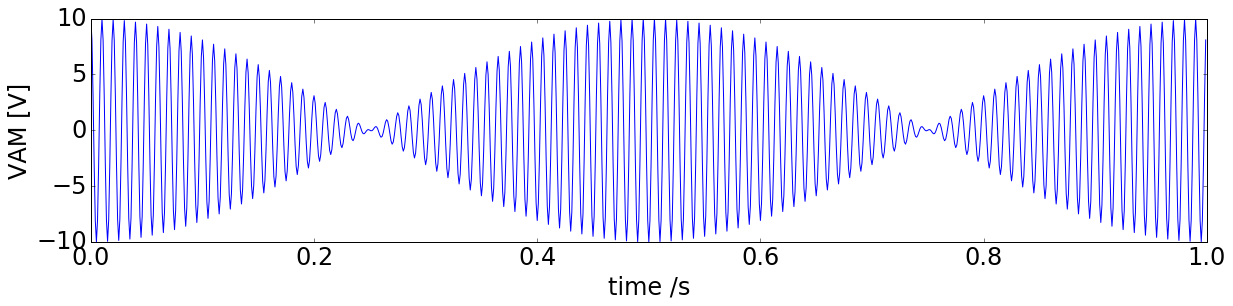

In [488]:
time = np.arange(0,Tm,dt)
vgs = list()
for t in time:
    vgs.append(vblu(ampa, 2*np.pi*fa*t,ampb, 2*np.pi*fb*t))

plt.plot(time,vgs)
plt.xlabel('time /s')
plt.ylabel('VAM [V]')
plt.show()

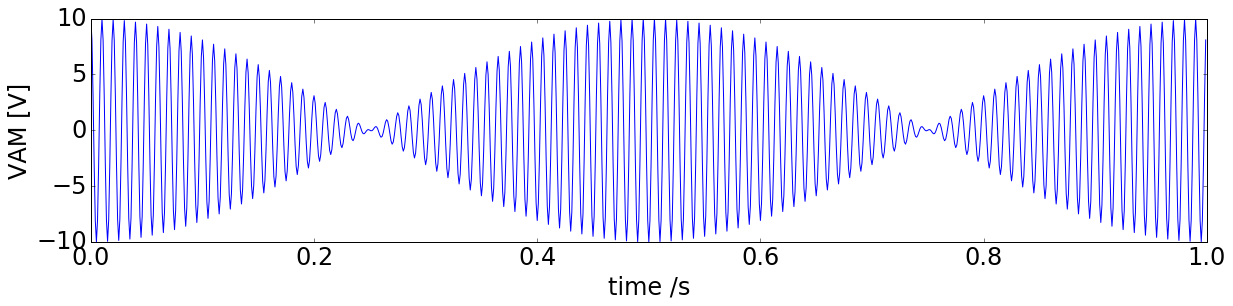

In [489]:
time = np.arange(0,Tm,dt)
vgsp = list()
for t in time:
    vgsp.append(vblup(amp, 2*np.pi*fmin*t, 2*np.pi*fmax*t))

plt.plot(time,vgsp)
plt.xlabel('time /s')
plt.ylabel('VAM [V]')
plt.show()

Analisis de Fourier para la senal AM de entrada

In [490]:
vin_f = list()

maxArmon = int(1.5 * fmax/fmin)
armonicos = np.arange(0,fmin*maxArmon,fmin)

vin_f = myFourier(armonicos, time, vgs, dt, Tm)


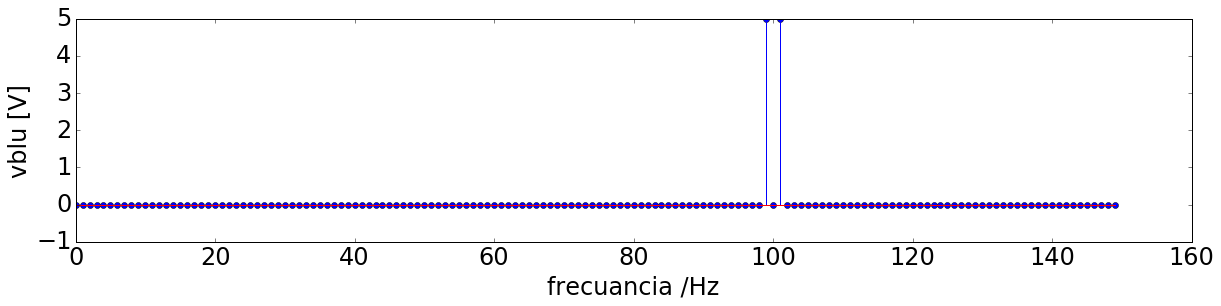

In [491]:
plt.stem(armonicos,vin_f) 
plt.xlabel('frecuancia /Hz')
plt.ylabel('vblu [V]')


Corriente de salida del transistor 

En un clase B todos los pulsos de corriente tiene un angulo de circulacion 

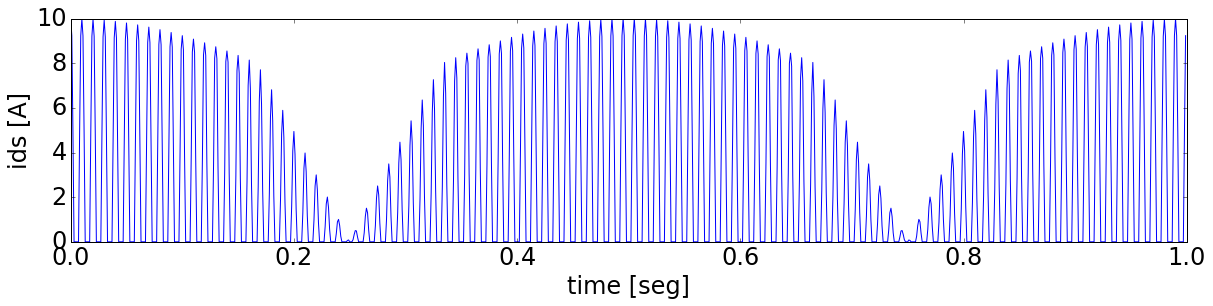

In [492]:
ids = []
for x,t in enumerate(time):
    ids.append(idi(vgs[x]))

plt.plot(time,ids)
plt.xlabel('time [seg]')
plt.ylabel('ids [A]')

Analisis de Fourier para la corriente de salida

In [493]:
iout_f = myFourier(armonicos, time, ids, dt, Tm)


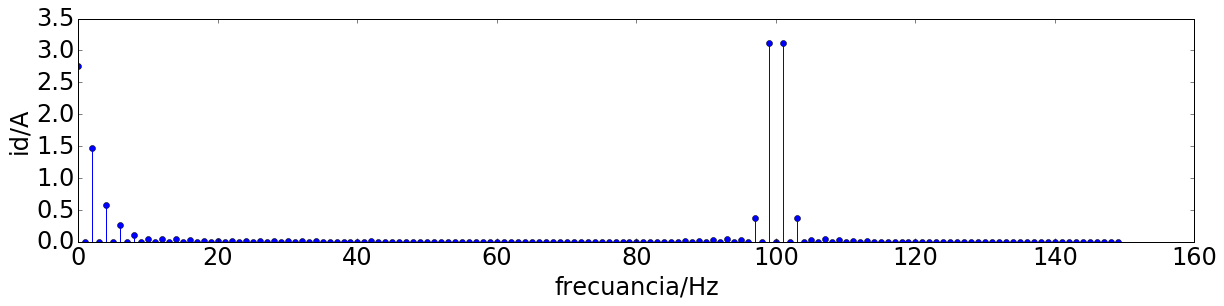

In [494]:
plt.stem(armonicos,(np.abs(iout_f[:]) ) )
plt.xlabel('frecuancia/Hz')
#plt.ylim([0,0.3])
plt.ylabel('id/A')

Analisis de la senal de salida
Calculo de primer armonico y continua de la portadora cada 360/n grados de la modulante

In [495]:
n    = 24

th_min = np.arange(0,2*np.pi, 2*np.pi/n)
th_max = np.arange(0,2*np.pi, 2*np.pi/n)


In [496]:
ids = dict() # corriente de salida
idf = dict() # auxiliar para el calculo de primer armonico
ido = list() # componente continua de portadora para distintos valores de la modulante
id1 = list() # componente primer armonico de la portadora para distintos valores de la modulante  


for t_min in th_min: # cada 360/n grados de la minima
    if t_min not in ids : ids[t_min] = list()
    if t_min not in idf : idf[t_min] = list()
    for t_max in th_max: # calculo DC y primer armonico de la portadora
        vgs = vblup(amp, t_min, t_max )
        ids[t_min].append(idi(vgs))
        idf[t_min].append(idi(vgs)*cos(t_max))
    ido.append(1/n * sum(ids[t_min])) 
    id1.append(2/n * sum(idf[t_min]))
  

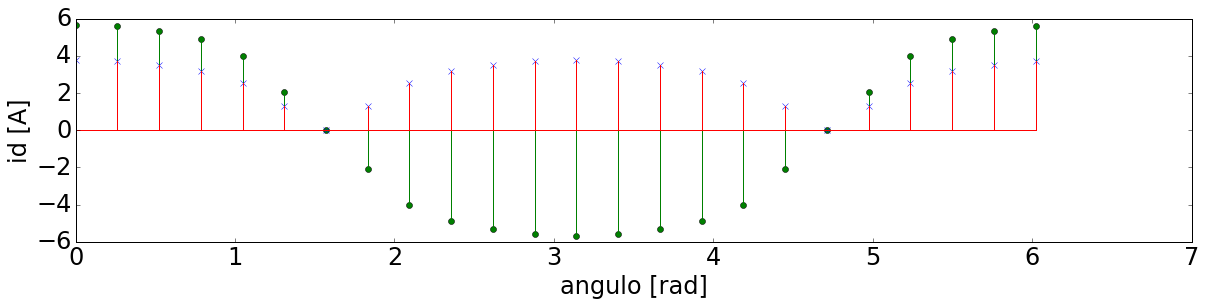

In [497]:
plt.stem(th_min,(id1) ,'g','go')
plt.stem(th_min,(ido),'r','x')
plt.xlabel('angulo [rad]')
plt.ylabel('id [A]')
#print(id1)

Eliminando el nivel de continua 

In [498]:
id1_o = 1/n * sum(id1)
id1s  = list(id1)

for x,t in enumerate(th_min):
    id1s[x] = id1s[x] - id1_o 
    
print(id1_o)    

-1.7023419710919066e-15


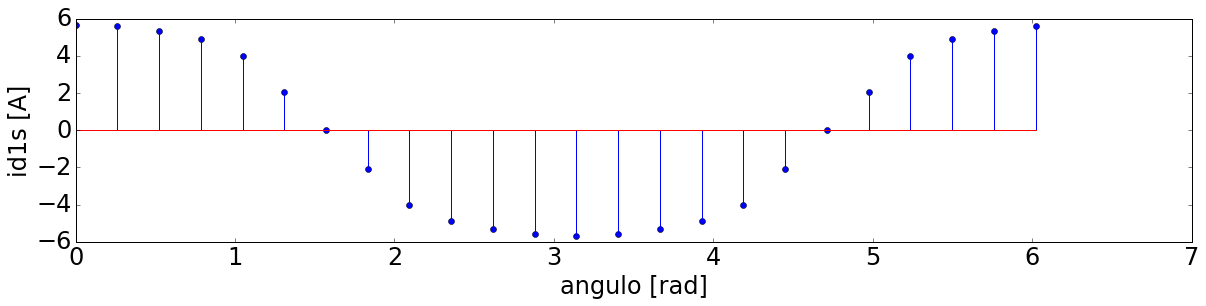

In [499]:
plt.stem(th_min,id1s) 
plt.xlabel('angulo [rad]')
plt.ylabel('id1s [A]')



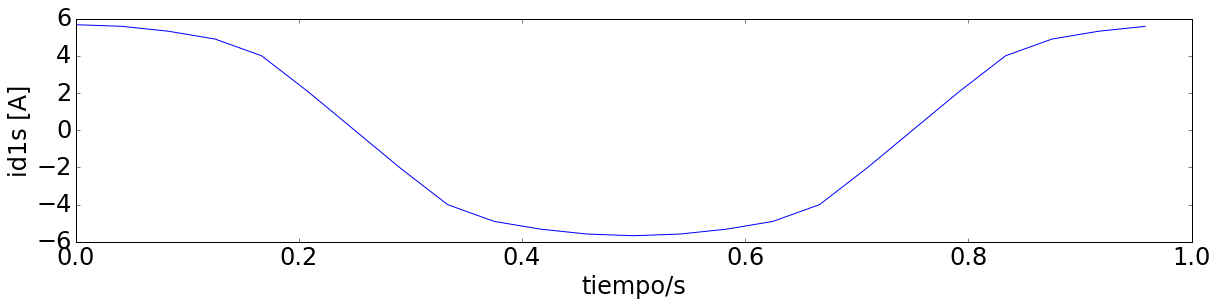

[  1.66533454e-16   6.27958643e+00   2.72004641e-15   7.15178168e-01
   1.38777878e-15   6.94226102e-02   3.84669162e-17   8.33333333e-02
   1.47104551e-15   6.04776296e-02   1.05471187e-15   1.63460352e-02]


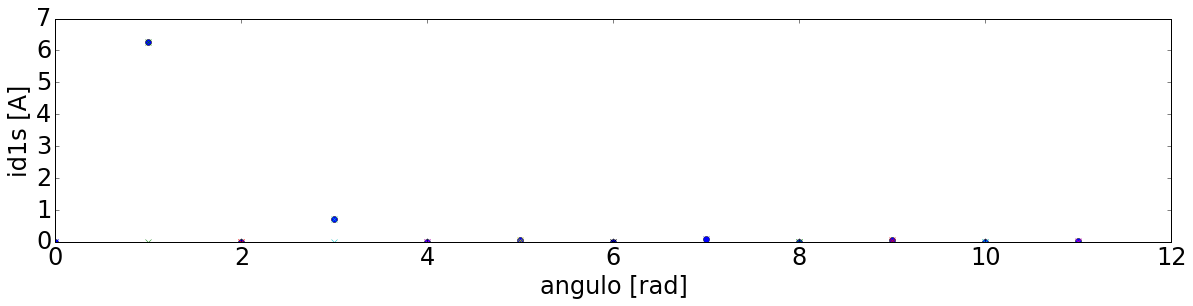

In [503]:
ti = th_min /fmin/(2*np.pi)

plt.plot(ti,id1s) 
plt.xlabel('tiempo/s')
plt.ylabel('id1s [A]')
plt.show()
sample = 1/fmin/n 
fsam    = 1/sample
marm = fsam/2
armon  = np.arange(0,marm,fmin)

sin  =  myFourier(armon, ti, id1s, sample, 1/fmin)
plt.stem(armon,np.abs(sin),'x') 
print(np.abs(sin))
plt.xlabel('angulo [rad]')
plt.ylabel('id1s [A]')

Para el calculo de la distorsion, Dist = 2 Veff/(v_1)^2 - 1 

In [501]:
ieff = 0.0
for x,t_m in enumerate(th_m) :
    ieff = ieff + id1s[x]**2
ieff = ieff / n
print('De la envolvente ieff=',ieff)

De la envolvente ieff= 19.980187088269464


In [502]:
id1s_f = []

for x, t_m in enumerate(th_m): # cada 360/n grados de la modulante
    id1s_f.append(id1s[x]*cos(t_m))
id1s_1 = (2/n * sum(id1s_f))

print('De la envolvente id1=',id1s_1)


De la envolvente id1= 6.27958642625798


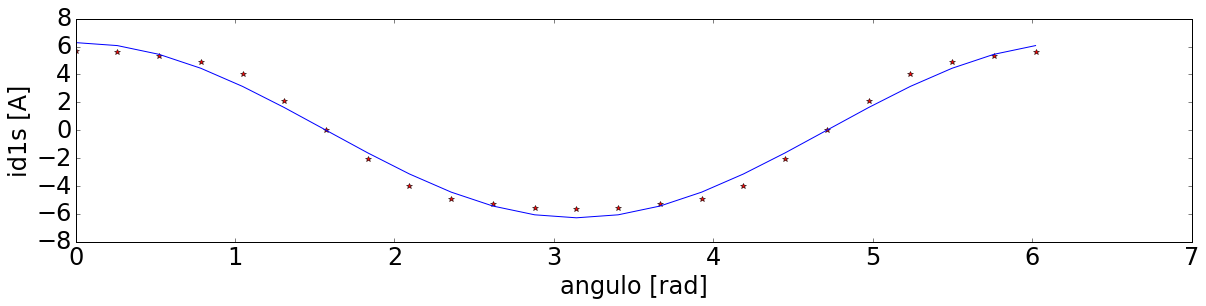

In [480]:
id1st = []
for t_m in th_m:
    id1st.append(id1s_1*cos(t_m))
    
plt.plot(th_m,id1s,'r*', th_m,id1st, 'b-') 
plt.xlabel('angulo [rad]')
plt.ylabel('id1s [A]')

In [481]:
dist = (2*ieff/id1s_1**2 - 1) * 100

print('distorsion=',  dist ,'%')

distorsion= 1.3368644079019942 %


In [261]:
#Portadora
idco = ido[int(n/4)] 
idc1 = id1[int(n/4)]

#Poradora en condicion de Pico
idcpo = ido[0] 
idcp1 = id1[0]

#Poradora en condicion de valle
idcvo = ido[int(n/8)] 
idcv1 = id1[int(n/8)]

print('Portadora                                                =>  idco=',idco,'A ,  idc1=',idc1,'A' )
print('Portadora en pico de modulante (solo el primer arminico) => idcpo=',idcpo,'A , idcp1=',idcp1,'A')
print('Portadora en valle de modulante (solo el primer arminico)=> idcvo=',idcvo,'A , idcv1=',idcv1,'A')



Portadora                                                =>  idco= 0.0 A ,  idc1= 0.0 A
Portadora en pico de modulante (solo el primer arminico) => idcpo= 3.5603949928700627 A , idcp1= 5.562059764020539 A
Portadora en valle de modulante (solo el primer arminico)=> idcvo= 2.8075425996010375 A , idcv1= 4.645072085145747 A


In [23]:
#calculo de la resistencia de carga de salida teniendo la portadora en pico para el primer armonico de la modulante
Vp  = (Vgs_max-Vgs_min)/ 2
VDD = Vp + Vgs_min
print('VDD=', VDD, 'V')
print('Vp=' , Vp, 'V')

RL = Vp / i_cp
print('RL=', RL, 'ohms')
 

VDD= 105.0 V
Vp= 95.0 V


NameError: name 'i_cp' is not defined

Calculo de las potencias

In [24]:
#Portadora
PDC_c = idco * VDD
PRL_c = idc1 * Vp / 2
PTR_c = PDC_c - PRL_c

#Portadora en pico 
PDC_cp = idcpo * VDD
PRL_cp = idcp1 * Vp / 2
PTR_cp = PDC_cp - PRL_cp

#Portadora en valle 
PDC_cv = idcvo * VDD
PRL_cv = idcv1 * Vp / 2
PTR_cv = PDC_cv - PRL_cv


print('Potencia de portadora            => PDC =', PDC_c, 'W, PRL=', PRL_c, 'W, PTR=',  PTR_c, 'W.')
print('Potencia de portadora en pico    => PDC =', PDC_cp,'W, PRL=', PRL_cp,'W, PTR=',  PTR_cp, 'W.')
print('Potencia de portadora en valle   => PDC =', PDC_cv,'W, PRL=', PRL_cv,'W, PTR=',  PTR_cv, 'W.')

Potencia de portadora            => PDC = 303.662224753 W, PRL= 206.11373335 W, PTR= 97.5484914022 W.
Potencia de portadora en pico    => PDC = 399.245470679 W, PRL= 267.967834315 W, PTR= 131.277636364 W.
Potencia de portadora en valle   => PDC = 375.674508295 W, PRL= 252.79659877 W, PTR= 122.877909524 W.


Estos pulsos de corriente son filtrados por un simple sintonizado 

In [572]:
def SS(vin,f, Qc, fo):
    return vin*abs(1/(1+(Qc*(f/fo-fo/f))**2)**0.5)

In [573]:
#calculo de la transferencia del filtro
vout_f = []
for x,i in enumerate(iout_f):
    vout_f.append(SS(i*RL,armonicos[x],Qc,fo))

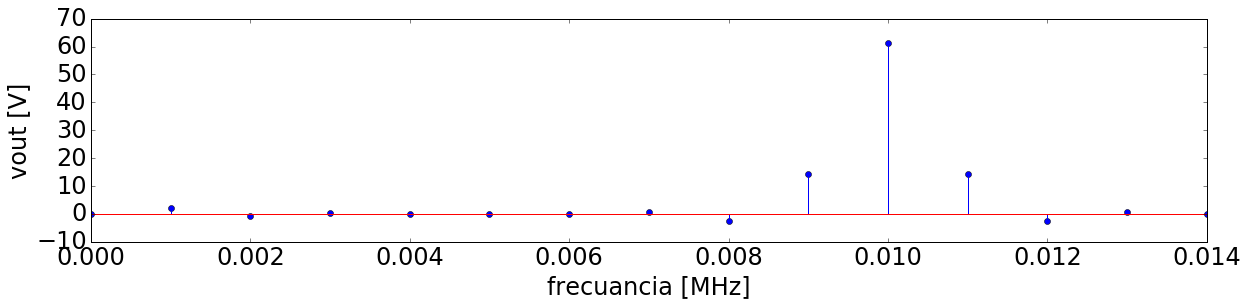

In [574]:
plt.stem(armonicos[:]/1e6,vout_f[:]) 
plt.xlabel('frecuancia [MHz]')
plt.ylabel('vout [V]')